# HW1


## Q1

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
zero_data_path = "/Users/liuchen/Desktop/math6450/hw1/digit/train0.csv"

data = pd.read_csv(zero_data_path, header=None).values
# print(data)

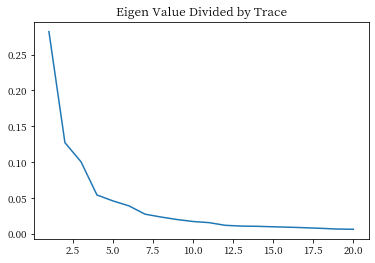

In [46]:
mu_0 = np.mean(data, axis=0, keepdims=True)
norm_data = data - mu_0
Sigma = np.matmul(norm_data.transpose(), norm_data)
u, s_o, vh = np.linalg.svd(Sigma)
K_num = 20
s_top_K = s_o[:K_num]
ratio = s_top_K/np.trace(Sigma)

plt.figure()
plt.plot(range(1,K_num+1), ratio)
plt.title("Eigen Value Divided by Trace")
plt.show()


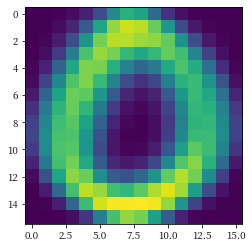

In [4]:
plt.imshow(np.reshape(mu_0, [16,16]))

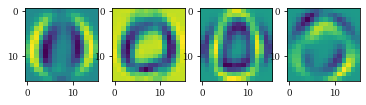

In [5]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(np.reshape(u[:,0], [16,16]))
plt.subplot(1,4,2)
plt.imshow(np.reshape(u[:,1], [16,16]))
plt.subplot(1,4,3)
plt.imshow(np.reshape(u[:,2], [16,16]))
plt.subplot(1,4,4)
plt.imshow(np.reshape(u[:,3], [16,16]))

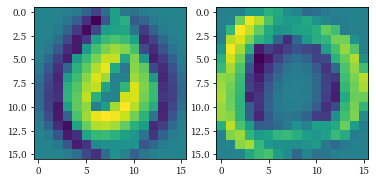

In [6]:
v1 = vh[0]
x1 = np.sum(norm_data * np.reshape(v1, [1,256]), 1)
sort_ind  = np.argsort(x1)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.reshape(norm_data[sort_ind[0]], [16,16]))
plt.subplot(1,2,2)
plt.imshow(np.reshape(norm_data[sort_ind[-1]], [16,16]))

[592 662 190 130 711]


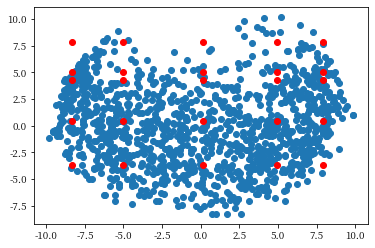

In [19]:
v1 = vh[0]
v2 = vh[1]
# plt.imshow(np.reshape(v2, [16,16]))
x =np.sum(norm_data * np.reshape(v1, [1,256]), 1)
y =np.sum(norm_data * np.reshape(v2, [1,256]), 1)
length = len(x)
x_ind = np.argsort(x)
y_ind = np.argsort(y)
# 5%, 25%, 50%, 75% and 95%
pick_inde = [int(length*j) for j in [0.05, 0.25, 0.5, 0.75, 0.95]]
x_point = x_ind[pick_inde]
y_point = y_ind[pick_inde]
# print(x_point)
# ssss
plt.figure()
plt.scatter(x, y)
for k in range(len(x_point)):
    
    plt.scatter(x[x_point], np.ones_like((x[x_point],) )* y[k],c='red')
    
plt.show()

In [62]:
import random
def shuffle_mat(X):
    X_new = np.zeros_like(X)
    for j in range(X.shape[1]):
        ind_list = list(range(X.shape[0]))
        random.shuffle(ind_list)
        X_new[:,j] = X[:,j][ind_list]
    return X_new
n_trial =100
# norm_data = norm_data.transpose()
lambd_matrix = np.zeros((n_trial, 256))
s_o = np.linalg.svd(Sigma, compute_uv=False)
# print(s_o)

for k in range(n_trial):
#     print(norm_data.shape)
    X_tmp = shuffle_mat(norm_data)
    Sigma = np.matmul(X_tmp.transpose(), X_tmp)
    lambd_matrix[k] = np.linalg.svd(Sigma, compute_uv=False)
    
    

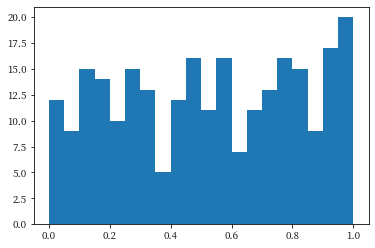

In [63]:
pval = np.zeros((256,))
for j in range(256):
    pval[j] = len([i for i in range(lambd_matrix.shape[0]) if lambd_matrix[i, j] < s_o[j] ])/n_trial
#     print(lambd_matrix[:, 0])
#     print(s_o[0])
#     print( pval[j])
plt.hist(pval, bins=20)
plt.show()
    

## Q2

In [75]:

distances = "   0 300 352 466 217 238 431 336 451  47 415 515" \
            " 300   0 638 180 595 190 138 271 229 236 214 393" \
            " 352 638   0 251  88 401 189 386 565 206 292 349" \
            " 466 180 251   0 139 371 169 316 180 284 206 198" \
            " 217 595  88 139   0 310 211 295 474 130 133 165" \
            " 238 190 401 371 310   0 202 122 378 157 362 542" \
            " 431 138 189 169 211 202   0 183  67 268 117 369" \
            " 336 271 386 316 295 122 183   0 483 155 448 108" \
            " 451 229 565 180 474 378  67 483   0 299 246 418" \
            " 47 236 206 284 130 157 268 155 299   0 202 327" \
            " 415 214 292 206 133 362 117 448 246 202   0 394" \
            " 515 393 349 198 165 542 368 108 418 327 394   0"
D = np.array([int(dist) for dist in distances.split()]).reshape(12, 12)

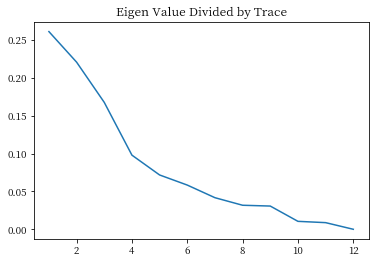

In [83]:
## house hold then SVD
H = np.eye(12) - 1/12 * np.matmul(np.ones((12, 1)),np.ones((1, 12)) )
# print(H)
K = -0.5 * np.matmul(np.matmul(H, D), H.transpose())
U, S,_ = np.linalg.svd(K)


ratio = S/np.sum(S)

plt.figure()
plt.plot(range(1,len(ratio)+1), ratio)
plt.title("Eigen Value Divided by Trace")
plt.show()
n = 2
S_new = S[:n]




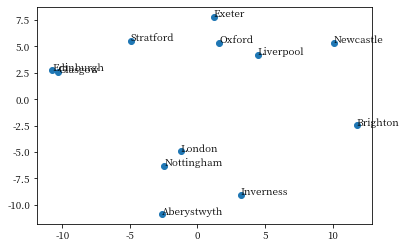

In [90]:
city_name = ["Aberystwyth","Brighton","Edinburgh","Exeter","Glasgow","Inverness","Liverpool","London","Newcastle","Nottingham","Oxford","Stratford"]
Z = np.matmul(np.diag(np.sqrt(S_new)), U.transpose()[:n])
plt.figure()
X= Z[0, :]
Y= Z[1, :]
plt.scatter(X, Y)
for i, label in enumerate(city_name):
    plt.annotate(label, (X[i], Y[i]))
plt.show()